# <center> Financial analysis of thermal batteries
Created by: Ahmad Mojiri  (06-Sep-2019)

In this Jupyter file, I am writing several codes to perform simple financial analysis of the thermal battery value.
The most useful parts of this code will be saved into seprate python scripts in the project folder. 

The description of each code has been presented as a note above the code in a 'Markdown' cell.



# Initiate the codes
This cell needs to be executed after the start or restart of the kernel. <br>
It adds the current path to the modelling files on the computer. <br>
The rest of the paths will be generated based on this root one.

In [2]:
import sys, os
print("Operating system: %s" %sys.platform)
if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')
os.chdir(curr_path)
print("Working directory is now %s" %curr_path)

Operating system: win32
Path added! 

Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


# Plot Storage value for different self-discharge values
This code needs to be created.

In [ ]:
To be created!!!

# Plot Storage value for different RTEs
This code reads data from table ```storage_value``` in  ```storage_value_arbitrage.db```. <br>
This table contains storage values for RTEs in the range of 40-100%. <br>
This code can plot the storage value for two different cases: price cap = 300, price_cap=14500 <br>



Operating system: win32
Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


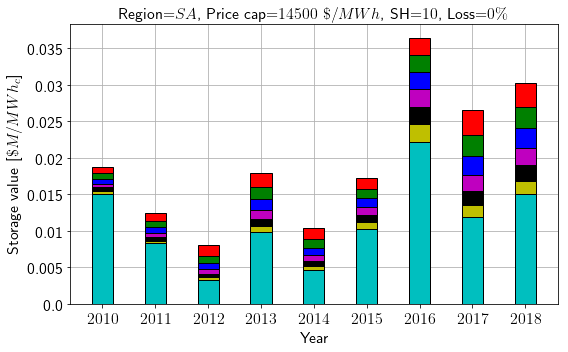

In [2]:
import sys, os
print("Operating system: %s" %sys.platform)
if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')
os.chdir(curr_path)
print("Working directory is now %s" %curr_path)
from projdirs import datadir
from package.optimisation import optimise, load_simparams
import numpy as np
import os, pdb, sqlite3
import pandas as pd
from projdirs import datadir, figdir, resultsdir
import matplotlib.pyplot as plt
import package.sql_manager as sm
import matplotlib as mpl
import seaborn as sns

state = 'SA'
RTEs = np.arange(100,30,-10)
SH = 10
loss=0
cap = 14500


table = 'storage_value'
db = 'storage_value_perfect_%s.db'%(state)
cols = [x[0] for x in sm.list_columns(db,table)]
Storage = sm.get_data(cols, table, db)
Storage['date_time'] = pd.to_datetime(Storage['date_time'])

Colors = ['r', 'g', 'b', 'm', 'k', 'y', 'c']



# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
font_size = 16
Years = np.arange(2010,2019,1)

for (i,RTE) in enumerate(RTEs):
    data = pd.DataFrame(columns=['year', 'SV'])
    for year in Years:
        capacity = SH*50
        storage = Storage[(Storage['date_time'].dt.year == year)&
                          (Storage['cap']==cap) &
                          (Storage['rte']==RTE) &
                          (Storage['sh']==SH) &
                          (Storage['loss']==loss)]
        
        SV = (0.5*(storage['Pout'] - storage['Pin'])*storage['RRP']).sum()/capacity
        data = data.append({'year':year,
                            'SV': SV}, ignore_index=True)
        

    
    data = data.sort_values('year', axis=0)
    plt.bar(data['year'], data['SV'], width=0.4,
                   color=Colors[i], label= (str(RTEs[i]))+'%', edgecolor='k'   )



plt.title(r'Region=$%s$, Price cap=$%d$ $\$/MWh$, SH=$%d$, Loss=$%d\%%$'
          % (state, cap, SH, loss), fontsize=font_size)



plt.ylabel(r'Storage value [$\$M/MWh_c$]', fontsize=font_size)
plt.xlabel(r'Year', fontsize=font_size)
plt.gca().set_yticklabels(['{:}'.format(x/1000000) for x in plt.gca().get_yticks()], fontsize=font_size) 
plt.xticks(list(Years), fontsize=font_size)

plt.rc('text', usetex=True)
plt.grid()
plt.tight_layout()
ax.set_axisbelow(True)
plt.show()
#         plt.savefig(
#                     'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs RTE\\%s-SV_cap=%d_SH=%d_Loss=%d.eps' %(State, price_cap, SH, loss), format='eps')
#         plt.savefig(
#                     'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs RTE\\%s-SV_ cap=%d_SH=%d_Loss=%d.png' %(State, price_cap, SH, loss), dpi=600)


# Plot storge value vs SH for each state

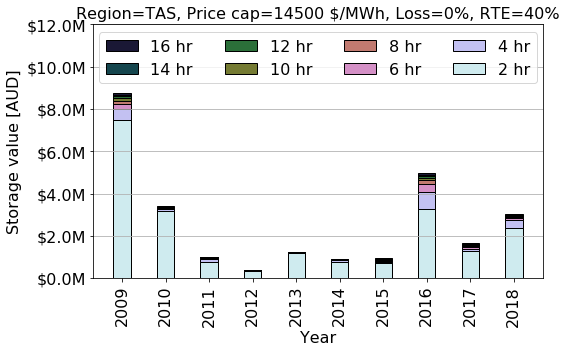

In [26]:
# Choose the round trip efficiency here
# choose the state
import seaborn as sns
state='TAS'
cap = 14500

#connect to the database that stores the capped storage values
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_arbitrage.db')

cursor = connection.cursor()
cursor.execute("SELECT state,year,sh,obj,rte, loss, cap FROM storage_value")
SV = pd.DataFrame(cursor.fetchall())
connection.close

SV.columns = ['state', 'year', 'sh', 'obj', 'rte', 'loss', 'cap']
RTE = 40
SHours = np.arange(16,0,-2)
loss = 0

# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
font_size = 16
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

for i in range(len(SHours)):
    SH = SHours[i]
    data = SV[(SV['state']==State) & (SV['cap']==price_cap) & 
              (SV['rte']==RTE) & (SV['sh']==SH) & (SV['loss']==loss)]
   
    
    data = data.sort_values('year', axis=0)
    plt.bar(data['year'], data['obj'], width=0.4,
                   color=sns.color_palette('cubehelix', 8)[i], label= (str(SH))+' hr', edgecolor='k'    )

plt.title('Region=%s, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
          % (State, price_cap, loss, RTE), fontsize=font_size)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.f}'))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Year', fontsize=font_size)
plt.xticks(np.arange(2009,2019,1), fontsize=font_size, rotation=90)
plt.ylim([0,12000000])
plt.rc('ytick', labelsize=font_size)
plt.ylabel('Storage value [AUD]', fontsize=font_size)
plt.legend(loc='upper center', fontsize=font_size, ncol=4)
plt.rcParams["axes.grid.axis"] ="x"
plt.rcParams["axes.grid"] = True

plt.grid()
plt.tight_layout()
plt.savefig(
            'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs SH_bar chart\\%s-SV_cap=%d_ RTE=%d.eps' %(State, price_cap, RTE), format='eps')
plt.savefig(
            'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs SH_bar chart\\%s-SV_ cap=%d_ RTE=%d.png' %(State, price_cap, RTE), dpi=600)



# Plot the Storage value vs SH in a linear plot for each year

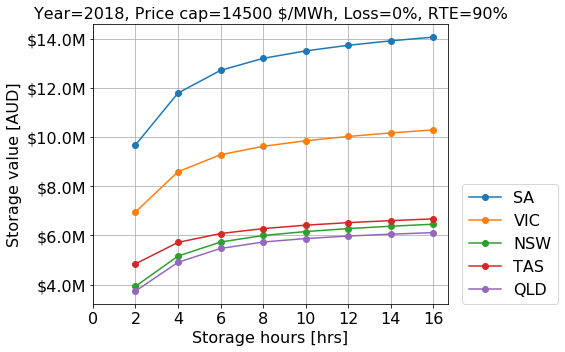

In [49]:
import seaborn as sns
State='TAS'
state = "'" + State + "'"
price_cap = 14500

#connect to the database that stores the capped storage values
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_arbitrage.db')

cursor = connection.cursor()
cursor.execute("SELECT state,year,sh,obj,rte, loss, cap FROM storage_value")
SV = pd.DataFrame(cursor.fetchall())
connection.close

SV.columns = ['state', 'year', 'sh', 'obj', 'rte', 'loss', 'cap']

# Start line plotting
RTE = 90
SHours = np.arange(16,0,-2)
loss = 0
for year in np.arange(2009,2019,1):
    plt.close("all")
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    states = np.array(['SA','VIC','NSW','TAS','QLD'])
    for i in range(len(states)):
        State = states[i]
        data = SV[(SV['state']==State) & (SV['cap']==price_cap) & 
                  (SV['rte']==RTE) & (SV['year']==year) & (SV['loss']==loss)]


        data = data.sort_values('sh', axis=0)
        plt.plot(data['sh'], data['obj'], color=sns.color_palette(sns.color_palette())[i],
                 label= State, marker='o')



    plt.title('Year=%d, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
              % (year, price_cap, loss, RTE), fontsize=font_size)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.f}'))
    ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))


    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    plt.xlabel('Storage hours [hrs]', fontsize=font_size)
    plt.xticks(np.arange(0,18,2), fontsize=font_size)
    plt.rc('ytick', labelsize=font_size)
    plt.ylabel('Storage value [AUD]', fontsize=font_size)
    plt.legend(loc=(1.04,0), fontsize=font_size)
    
    plt.grid(which='minor', axis='x')
    plt.grid(which='major', axis='y')
    plt.tight_layout()

    plt.savefig(
                'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs SH_line chart\\%d-SV_cap=%d_loss=%d_RTE=%d.eps' %(year, price_cap, loss, RTE), format='eps')
    plt.savefig(
                'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value vs SH_line chart\\%d-SV_ cap=%d_loss=%d_RTE=%d.png' %(year, price_cap, loss, RTE), dpi=600)



# Compare storage value for 2 cases: perfect foresigth vs 24-hr foresigth
This code loads the storage value data for a state for these two cases from the associated database files: <br>
```storage_value_arbitrage.db``` ----->  perfect foresight storage <br>
```storage_value_arbitrage_short_foresigth.db``` ----> 24-hr foresigth

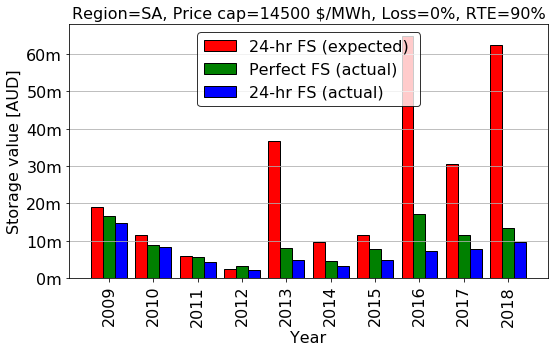

In [70]:
import datetime
import seaborn as sns
import matplotlib as mpl
#connect to the database that stores the capped storage values with 24-hr foresigth
State = 'SA'
state = '"'+State+'"'
Loss = 0
RTE=90
SH=10
price_cap = 14500

connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_daily_forecast_foresight.db')
cursor = connection.cursor()
cursor.execute("SELECT state,date,sh,rte, cap, loss, obj_forecast, obj_actual FROM storage_value where state="+ state)
data = pd.DataFrame(cursor.fetchall())
connection.close

SV_24hr=pd.DataFrame({'year':[], 'obj_actual':[], 'obj_forecast':[]})
for Year in np.arange(2009,2019,1):
    data.columns = ['state', 'date', 'sh', 'rte', 'cap', 'loss', 'obj_forecast', 'obj_actual']
    data['date'] = pd.to_datetime(data['date'])
    obj_actual = data[(data['date'].dt.year==Year) &
        (data['sh']==SH) & 
        (data['rte']==RTE) &
        (data['loss']==Loss)]['obj_actual'].sum()
    
    obj_forecast = data[(data['date'].dt.year==Year) &
        (data['sh']==SH) & 
        (data['rte']==RTE) &
        (data['loss']==Loss)]['obj_forecast'].sum()
    
    SV_24hr  = SV_24hr.append({'year': Year,
                               'obj_actual': obj_actual,
                               'obj_forecast': obj_forecast},
                              ignore_index=True)
    

connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_arbitrage.db')
cursor = connection.cursor()
cursor.execute("SELECT state,year,sh,obj,rte, loss, cap FROM storage_value")
SV = pd.DataFrame(cursor.fetchall())
connection.close
SV.columns = ['state', 'year', 'sh', 'obj', 'rte', 'loss', 'cap']


# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)


data = SV[(SV['state']==State) & (SV['cap']==price_cap) & 
          (SV['rte']==RTE) & (SV['sh']==SH) & (SV['loss']==Loss)]

SV = data.sort_values('year', axis=0)
Width=0.27
plt.bar(SV_24hr['year']-Width, SV_24hr['obj_forecast'], width=-Width,
               color='r', label= '24-hr FS (expected) ', edgecolor='k', align='center'   )

plt.bar(SV['year'], SV['obj'], width=Width,
               color='g', label= 'Perfect FS (actual)', edgecolor='k', align='center'   )

plt.bar(SV_24hr['year']+Width, SV_24hr['obj_actual'], width=Width,
               color='b', label= '24-hr FS (actual)', edgecolor='k', align='center'   )

plt.title('Region=%s, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
          % (State, price_cap, Loss, RTE), fontsize=font_size)

font_size = 16
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fm' % (x * 1e-6)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.f}'))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Year', fontsize=font_size)
plt.xticks(np.arange(2009,2019,1), fontsize=font_size, rotation=90)
# plt.ylim([0,12000000])
plt.rc('ytick', labelsize=font_size)
plt.ylabel('Storage value [AUD]', fontsize=font_size)
plt.legend(loc='upper center', fontsize=font_size)
plt.rcParams["legend.edgecolor"] = 'k'
plt.rcParams["axes.grid.axis"] ="x"
plt.rcParams["axes.grid"] = True

plt.grid()
plt.tight_layout()
# plt.show()

# Perfect foresigth vs 24-hr foresigth
plt.savefig(
'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Perfect foresigth vs 24-hr foresigth\\%s-SV_cap=%d_loss=%d_RTE=%d.eps' %(State, price_cap, Loss, RTE), format='eps')
plt.savefig(
'c:\\Nextcloud\\Thermal Battery Research\\Publications\\The value of grid-scale electricity storage in competitive energy market\\pictures\\Perfect foresigth vs 24-hr foresigth\\%s-SV_cap=%d_loss=%d_RTE=%d.png' %(State, price_cap, Loss, RTE), dpi=600)


# Plot Storage value for different foresigth windows
This code reads data from ```storage_value_rolling_window.db```.

In [38]:
import datetime
import seaborn as sns
import matplotlib as mpl

State = 'SA'
state = '"'+State+'"'
Loss = 0
RTE=40
SH=10
price_cap = 14500
Windows = np.array([1,2,3])

connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_rolling_horizon.db')
cursor = connection.cursor()
cursor.execute("SELECT state,date,sh,rte,cap,loss,window,obj FROM storage_value where state="+ state)
data = pd.DataFrame(cursor.fetchall())
connection.close

SV_rolling=pd.DataFrame({'year':[], 'window':[], 'obj':[]})
for Year in np.arange(2009,2019,1):
    data.columns = ['state', 'date', 'sh', 'rte', 'cap', 'loss', 'window', 'obj']
    for win in Windows:
        data['date'] = pd.to_datetime(data['date'])
        obj = data[(data['date'].dt.year==Year) &
            (data['sh']==SH) &
            (data['window']==win) &
            (data['rte']==RTE) &
            (data['loss']==Loss)]['obj'].sum()

        SV_rolling = SV_rolling.append({'year': Year,
                                        'window': win,
                                        'obj': obj},
                                       ignore_index=True)
    

connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_value_arbitrage.db')
cursor = connection.cursor()
cursor.execute("SELECT state,year,sh,obj,rte, loss, cap FROM storage_value")
SV = pd.DataFrame(cursor.fetchall())
connection.close
SV.columns = ['state', 'year', 'sh', 'obj', 'rte', 'loss', 'cap']
data = SV[(SV['state']==State) & (SV['cap']==price_cap) & 
          (SV['rte']==RTE) & (SV['sh']==SH) & (SV['loss']==Loss)]

SV = data.sort_values('year', axis=0)


# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
font_size = 16
Width=0.20

plt.bar(SV_rolling[SV_rolling['window']==Windows[0]]['year']-2*Width,
        SV_rolling[SV_rolling['window']==Windows[0]]['obj'], width=Width,
        color='r', label= '%d-day rolling FS'%(Windows[0]), edgecolor='k', align='edge')


plt.bar(SV_rolling[SV_rolling['window']==Windows[1]]['year']-1*Width,
        SV_rolling[SV_rolling['window']==Windows[1]]['obj'], width=Width,
               color='g', label= '%d-day rolling FS'%(Windows[1]), edgecolor='k', align='edge'   )


plt.bar(SV_rolling[SV_rolling['window']==Windows[2]]['year'],
        SV_rolling[SV_rolling['window']==Windows[2]]['obj'], width=Width,
               color='b', label= '%d-day rolling FS'%(Windows[2]), edgecolor='k', align='edge'   )


plt.bar(SV['year']+Width, SV['obj'], width=Width,
               color='m', label= 'Perfect FS', edgecolor='k', align='edge'   )


plt.title('Region=%s, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
          % (State, price_cap, Loss, RTE), fontsize=font_size)


from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fm' % (x * 1e-6)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.f}'))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Year', fontsize=font_size)
plt.xticks(np.arange(2009,2019,1), fontsize=font_size, rotation=90)
# plt.ylim([9000000,10000000])

plt.rc('ytick', labelsize=font_size)
plt.ylabel('Storage value [AUD]', fontsize=font_size)
plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1), fontsize=font_size, fancybox=True, framealpha=1)
plt.rcParams["legend.edgecolor"] = 'k'

# plt.rcParams["axes.grid.axis"] ="y"
# plt.rcParams["axes.grid"] = True


ax.grid(zorder=0, axis='y', linestyle='-', color='gray')
ax.set_axisbelow(True)
plt.tight_layout()
# plt.show()

# Perfect foresigth vs 24-hr foresigth
plt.savefig(
'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
The value of grid-scale electricity storage in competitive energy market\\\
pictures\\Perfect foresigth vs short foresight\\%s-SV_cap=%d_loss=%d_RTE=%d.eps'
    %(State, price_cap, Loss, RTE), format='eps')

plt.savefig(
'd:\\Nextcloud\\Thermal Battery Research\\Publications\\\
The value of grid-scale electricity storage in competitive energy market\\\
pictures\\Perfect foresigth vs short foresight\\%s-SV_cap=%d_loss=%d_RTE=%d.png'
    %(State, price_cap, Loss, RTE), dpi=600)


# Compare the storage value with perfect, daily, and rolling forecast

Operating system: win32
Working directory is now c:\Nextcloud\Thermal Battery Research\modelling\python


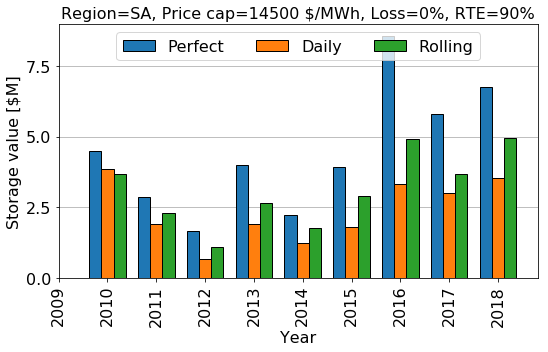

In [10]:
# Choose the round trip efficiency here
# choose the state
import sys, os
print("Operating system: %s" %sys.platform)
if sys.platform == 'win32':
    curr_path = 'c:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
elif sys.platform == 'linux':
    curr_path = '/home/jeff/cloud/documents/work/ANU/Thermal Battery Research/modelling/python'
else: print("What operating system are you running?! I've never even heard of %s" %sys.platform)
if curr_path not in sys.path:
    sys.path.append(curr_path)
    print('Path added! \n')
os.chdir(curr_path)
print("Working directory is now %s" %curr_path)
import matplotlib.pyplot as plt
import package.sql_manager as sm
import numpy as np
import pandas as pd

State='SA'
price_cap = 14500
RTE = 90
SH = 10
loss = 0

#connect to the database that stores the capped storage values with perfect foresigth
db = 'storage_value_perfect_%s.db'%(State)
table = 'storage_value'
cols = [x[0] for x in sm.list_columns(db,table)]
Storage_Perf = sm.get_data(cols,table,db)
Storage_Perf['date_time']=pd.to_datetime(Storage_Perf['date_time'])

#connect to the database that stores the capped storage values with 24-hr forecast
db = 'storage_value_daily_forecast_%s.db'%(State)
cols = [x[0] for x in sm.list_columns(db,table)]
Storage_Daily = sm.get_data(cols,table,db)
Storage_Daily['date_time']=pd.to_datetime(Storage_Daily['date_time'])

#connect to the database that stores the capped storage values with rolling forecast
db = 'storage_value_rolling_forecast_%s.db'%(State)
cols = [x[0] for x in sm.list_columns(db,table)]
Storage_Rolling = sm.get_data(cols,table,db)
Storage_Rolling['date_time']=pd.to_datetime(Storage_Rolling['date_time'])


SV = pd.DataFrame(columns=['year', 'rte', 'SV_perf', 'SV_daily'])
for Year in np.arange(2010,2019,1):
    storage_perf = Storage_Perf[
        (Storage_Perf['state']==State) &
        (Storage_Perf['rte']==RTE) &
        (Storage_Perf['date_time'].dt.year==Year)]
    SV_perf = (0.5*(storage_perf['Pout']-storage_perf['Pin'])*
               storage_perf['RRP']).sum()
    
    storage_daily = Storage_Daily[
        (Storage_Daily['state']==State) &
        (Storage_Daily['rte']==RTE) &
        (Storage_Daily['date_time'].dt.year==Year)]
    SV_daily = (0.5*(storage_daily['Pout']-storage_daily['Pin'])*
                storage_daily['RRP']).sum()
    
    storage_rolling = Storage_Rolling[
        (Storage_Rolling['state']==State) &
        (Storage_Rolling['rte']==RTE) &
        (Storage_Rolling['date_time'].dt.year==Year)]
    SV_rolling = (0.5*(storage_rolling['Pout']-storage_rolling['Pin'])*
                storage_rolling['RRP']).sum()
    
    SV = SV.append({'year': Year,
                    'rte':RTE,
                    'SV_perf':SV_perf,
                    'SV_daily': SV_daily,
                    'SV_rolling': SV_rolling
                    }, ignore_index=True)

# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
font_size = 16

Width = 0.25
plt.bar(SV['year']-Width, SV['SV_perf'], width=Width, label= 'Perfect', edgecolor='k')
plt.bar(SV['year'], SV['SV_daily'], width=Width, label= 'Daily', edgecolor='k')
plt.bar(SV['year']+Width, SV['SV_rolling'], width=Width, label= 'Rolling', edgecolor='k')

plt.title('Region=%s, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
          % (State, price_cap, loss, RTE), fontsize=font_size)
plt.xlabel('Year', fontsize=font_size)
plt.xticks(np.arange(2009,2019,1), fontsize=font_size, rotation=90)
plt.rc('ytick', labelsize=font_size)
plt.ylabel('Storage value [$M]', fontsize=font_size)
plt.gca().set_yticklabels(['{:}'.format(x/1000000) for x in plt.gca().get_yticks()]) 
plt.legend(loc='upper center', fontsize=font_size, ncol=4)
plt.rcParams["axes.grid.axis"] ="x"
plt.rcParams["axes.grid"] = True

plt.grid()
plt.tight_layout()
ax.set_axisbelow(True)
# plt.show()

plt.savefig(
'c:\\Nextcloud\\Thermal Battery Research\\Publications\\paper_1\\pictures\\Forecast comparison\\%s_RTE=%d.eps'%(State, RTE), format='eps')
plt.savefig(
'c:\\Nextcloud\\Thermal Battery Research\\Publications\\paper_1\\pictures\\Forecast comparison\\%s_RTE=%d.png'%(State, RTE), dpi=600)              

In [3]:
import projdirs
import package.sql_manager as sm
import pandas as pd
db = 'storage_value_rolling_forecast_QLD.db'
table = 'storage_value'
cols = [x[0] for x in sm.list_columns(db,table)]
data = sm.get_data(cols, table, db)
data['date_time'] = pd.to_datetime(data['date_time'])
data

,state,date_time,sh,rte,cap,loss,window,Pin,Pout,RRP,Q_start,Q_end,obj
0,QLD,2010-01-01 04:00:00,10,90,14500,0,48,50.0,0.000000e+00,12.86,0.000000e+00,2.475000e+01,-3.215000e+02
1,QLD,2010-01-01 04:30:00,10,90,14500,0,47,50.0,0.000000e+00,14.63,2.475000e+01,4.950000e+01,-3.657500e+02
2,QLD,2010-01-01 05:00:00,10,90,14500,0,46,50.0,0.000000e+00,14.87,4.950000e+01,7.425000e+01,-3.717500e+02
3,QLD,2010-01-01 05:30:00,10,90,14500,0,45,50.0,0.000000e+00,11.41,7.425000e+01,9.900000e+01,-2.852500e+02
4,QLD,2010-01-01 06:00:00,10,90,14500,0,44,50.0,0.000000e+00,14.86,9.900000e+01,1.237500e+02,-3.715000e+02
5,QLD,2010-01-01 06:30:00,10,90,14500,0,43,50.0,0.000000e+00,15.97,1.237500e+02,1.485000e+02,-3.992500e+02
6,QLD,2010-01-01 07:00:00,10,90,14500,0,42,50.0,0.000000e+00,16.03,1.485000e+02,1.732500e+02,-4.007500e+02
7,QLD,2010-01-01 07:30:00,10,90,14500,0,41,50.0,0.000000e+00,17.40,1.732500e+02,1.980000e+02,-4.350000e+02
8,QLD,2010-01-01 08:00:00,10,90,14500,0,40,0.0,0.000000e+00,19.32,1.980000e+02,1.980000e+02,0.000000e+00
9,QLD,2010-01-01 08:30:00,10,90,14500,0,39,0.0,0.000000e+00,19.51,1.980000e+02,1.980000e+02,0.000000e+00


In [76]:
import package.get_NEM_data as gd
State = 'QLD'
db = 'storage_value_rolling_forecast_%s.db'%(State)
cols = [x[0] for x in sm.list_columns(db,table)]
Storage_Rolling = sm.get_data(cols,table,db)
rrp = pd.Series()
for year in np.arange(2010,2019,1):
    rrp = rrp.append(gd.load_rrp_cal(year, State),ignore_index=False)
x = rrp[pd.to_datetime(Storage_Rolling['date_time']).values]
Storage_Rolling['RRP']= x.values

cols_to_record = Storage_Rolling.columns.tolist()
db = 'storage_value_rolling_forecast_%s_new2.db'%(State)
sm.replace_into_db(Storage_Rolling,db,'storage_value',cols_to_record,create_unique_idx=True,idx_cols=cols_to_record[0:6])

    

'Data was recorded into the database!'

# Rolling forecast storage values
This function plots the storage value for different cases:<br>
(a) 0.5-hourly rolling forecast prices <br>
(b) Daily forecast prices generated just before 24:00 <br>
(c) Perfect foresight 


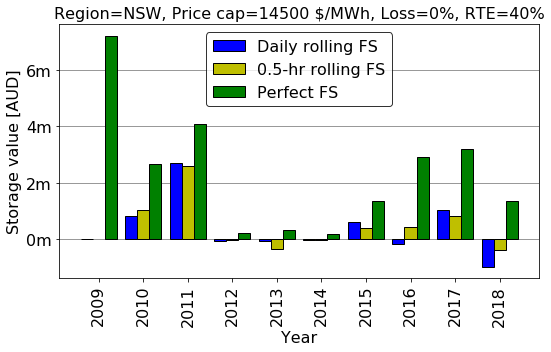

In [12]:
import datetime
import seaborn as sns
import matplotlib as mpl
import package.sql_manager as sm

State = 'NSW'
state = '"'+State+'"'
Loss = 0
RTE=40
SH=10
price_cap = 14500

# get storage value generated by 24-hr forecast
db = 'storage_value_daily_forecast.db'
table = 'storage_value'
cols = ['state','date_time','sh','rte', 'loss', 'cap', 'Pin', 'Pout', 'obj_forecast', 'obj_actual']
data = sm.get_data(cols, table, db )
 
data = data[data['state']==State]

# calculate the actual storage value for each year based on the daily values
SV_24hr=pd.DataFrame({'year':[], 'obj_actual':[], 'obj_forecast':[]})
for Year in np.arange(2009,2019,1):
    data.columns = cols
    data['date_time'] = pd.to_datetime(data['date_time'])
    obj_actual = data[(data['date_time'].dt.year==Year) &
        (data['sh']==SH) & 
        (data['rte']==RTE) &
        (data['loss']==Loss)]['obj_actual'].sum()
    
    obj_forecast = data[(data['date_time'].dt.year==Year) &
        (data['sh']==SH) & 
        (data['rte']==RTE) &
        (data['loss']==Loss)]['obj_forecast'].sum()
    
    SV_24hr  = SV_24hr.append({'year': Year,
                               'obj_actual': obj_actual,
                               'obj_forecast': obj_forecast},
                              ignore_index=True)


    
# get storage value generated by 0.5-hourly rolling forecast
cols = ['state','date_time', 'sh', 'rte', 'cap', 'loss', 'window',
                    'Pin', 'Pout', 'Q_start', 'Q_end', 'obj']
data = sm.get_data(cols, 'storage_value', 'storage_value_rolling_forecast.db')
data = data[data['state']==State]
data['date_time'] = pd.to_datetime(data['date_time'])

#calculate the annual storage value based on the half-hourly values
SV_rolling_forecast=pd.DataFrame({'year':[], 'obj_actual':[]})
for Year in np.arange(2010,2019,1):
    obj_actual = data[(data['date_time'].dt.year==Year) &
        (data['sh']==SH) & 
        (data['rte']==RTE) &
        (data['loss']==Loss)]['obj'].sum()
    
    SV_rolling_forecast  = SV_rolling_forecast.append({'year': Year,
                               'obj_actual': obj_actual},
                              ignore_index=True)
 
# get storage value geenrated by perfect foresight
cols = ['state', 'year', 'sh', 'obj', 'rte', 'loss', 'cap']
SV_PF = sm.get_data(cols, 'storage_value', 'storage_value_arbitrage.db' )
data = SV_PF[(SV_PF['state']==State) & (SV_PF['cap']==price_cap) & 
          (SV_PF['rte']==RTE) & (SV_PF['sh']==SH) & (SV_PF['loss']==Loss)]
SV_PF = data.sort_values('year', axis=0)

# plotting
plt.close("all")
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
font_size = 16
Width=0.27

plt.bar(SV_24hr['year']-1.5*Width, SV_24hr['obj_actual'], width=Width,
               color='b', label= 'Daily rolling FS', edgecolor='k', align='edge'   )

plt.bar(SV_rolling_forecast['year']-0.5*Width, SV_rolling_forecast['obj_actual'], width=Width,
               color='y', label= '0.5-hr rolling FS', edgecolor='k', align='edge'   )

plt.bar(SV_PF['year']+0.5*Width, SV_PF['obj'], width=Width,
               color='g', label= 'Perfect FS', edgecolor='k', align='edge'   )


plt.title('Region=%s, Price cap=%d $/MWh, Loss=%d%%, RTE=%d%%'
          % (State, price_cap, Loss, RTE), fontsize=font_size)

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fm' % (x * 1e-6)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.f}'))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.0f'))

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Year', fontsize=font_size)
plt.xticks(np.arange(2009,2019,1), fontsize=font_size, rotation=90)
# plt.ylim([0,17500000])
plt.rc('ytick', labelsize=font_size)
plt.ylabel('Storage value [AUD]', fontsize=font_size)
plt.legend(loc='upper center', fontsize=font_size)
plt.rcParams["legend.edgecolor"] = 'k'
ax.grid(zorder=0, axis='y', linestyle='-', color='gray')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()


# This code has not been labled yet
The following code finds the mean, standard deviation, minimum, and maximum of the spot prices for each state in every year. The standard deviation may not be an appropriate term for these prices because the second graph generated in this code shows that the price values don't fit in a normal distribution

<IPython.core.display.Javascript object>


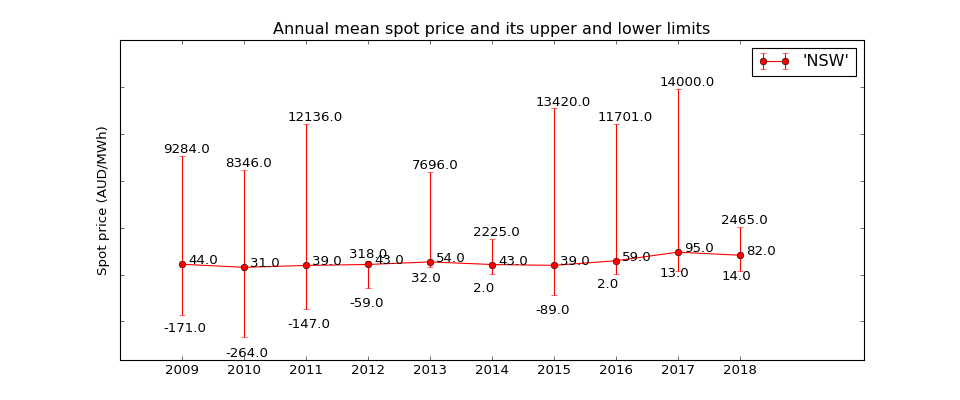

<IPython.core.display.Javascript object>


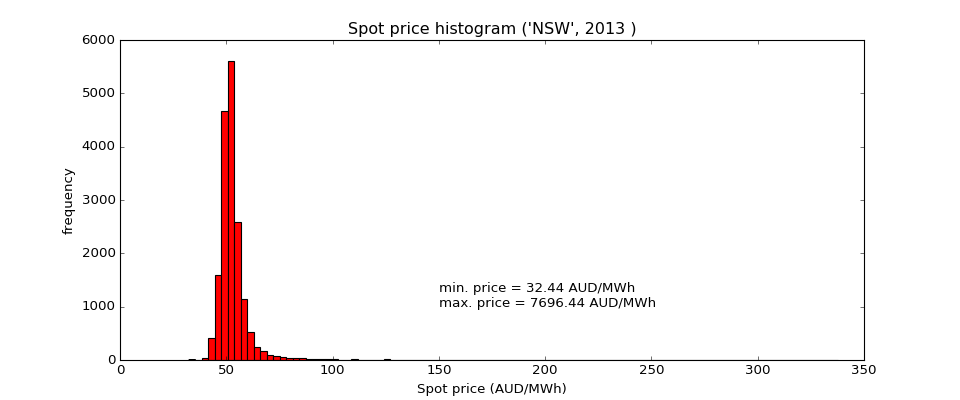

In [44]:
"""
This code extracts the mean and standard deviation of the spot price in the NEM.
"""
import sys
#Check and see if the current working path exists in python system.
#otherwise add it.
curr_path = 'D:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
if curr_path not in sys.path:
    sys.path.append('D:\\Nextcloud\\Thermal Battery Research\\modelling\\python')
    print('Path added!')

#This maginc command allows showing plots in Jupyter and makes them interactive.
%matplotlib notebook 

from projdirs import datadir, figdir, resultsdir
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import pdb

#connect to the database that stores the storage values for different states, year, RTE
# Note: in this database, only 10-hr storage values have been stored. 
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'arbitrage.db')
cursor = connection.cursor()

states = ['NSW']
#['QLD', 'NSW', 'VIC', 'SA', 'TAS']
years = np.arange(2009,2019,1)

fig, ax = plt.subplots(figsize=(12,5))
colors = ['r', 'g', 'b', 'y', 'm']
bar_width = 0.15
i = len(states)
for state in states:
    state = "'" + state + "'"
    cursor.execute("SELECT price FROM storage WHERE state =" + state + " AND sh=10 ")
    fetched = [row[0] for row in cursor.fetchall()]
    prices = [(np.array(str.split(x,',')[:-1])).astype(np.float) for x in fetched]
    price_mean = [np.mean(x) for x in prices]
    price_min = [np.min(x) for x in prices]
    price_max = [np.max(x) for x in prices]
    price_std = [np.std(x) for x in prices]
    ax.errorbar(years, price_mean, yerr =
                [[x-y for x,y in zip(price_mean,price_min)], [0.05*(y-x) for x,y in zip(price_mean,price_max)]],
                label = state, color=colors[len(states)-i], fmt='-o')
    i -=1

plt.xticks(list(years))
plt.xlim(2008,2020)
plt.ylim(np.min(price_min)-100,1000)
ax.set_yticklabels([])
plt.legend()
plt.title('Annual mean spot price and its upper and lower limits')
plt.ylabel('Spot price (AUD/MWh)')
for a,b in zip(years+0.1, price_mean):
    plt.text(a, b, str(round(b,0)))
for a,c,d,e in zip(years, price_mean, price_max, price_min):
    plt.text(a-0.3, 0.05*d+c+10, str(round(d)))
    plt.text(a-0.3, e+c-120, str(round(e)))
plt.show()


# plot the histogram of the prices for a certain year and state that is determined above

i = 4 # chooses the year i=0 -> 2009
year = years[i]
fig, ax = plt.subplots(figsize=(12,5))
x = np.array(prices[i])
plt.hist(x[np.logical_and(x>-100,x<500)], bins=100, color='r')
plt.xlabel('Spot price (AUD/MWh)')
plt.ylabel('frequency')
plt.title('Spot price histogram (%s, %s )'% (state, str(year)))
plt.text(150, 1000, 'min. price = %s AUD/MWh \nmax. price = %s AUD/MWh'% (min(prices[i]), max(prices[i])))
plt.show()

<IPython.core.display.Javascript object>


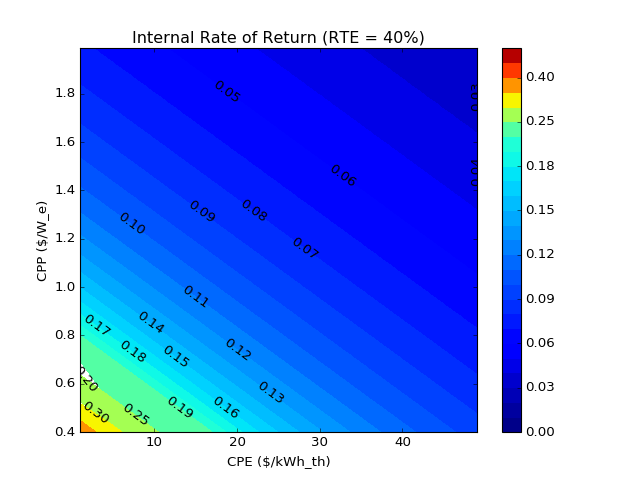

In [7]:
import sys
#Check and see if the current working path exists in python system.
#otherwise add it.
curr_path = 'D:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
if curr_path not in sys.path:
    sys.path.append('D:\\Nextcloud\\Thermal Battery Research\\modelling\\python')
    print('Path added!')

#This maginc command allows showing plots in Jupyter and makes them interactive.
%matplotlib notebook 

from projdirs import datadir, figdir, resultsdir
import numpy as np
import matplotlib.pyplot as mpl
from matplotlib import rcParams
import pdb
import sqlite3

state = 'NSW'
state = '"'+state+'"'
objlist = []
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'arbitrage.db')
cursor = connection.cursor()
cursor.execute("""SELECT obj FROM storage WHERE state = 'NSW' AND sh=10 """)
objlist = [row[0] for row in cursor.fetchall()]
year = np.arange(2009,2019,1)


SH = 10
Pout_max = 50 #MWth
eta_in = 0.99
eta_out = 0.4
RTE = eta_in * eta_out
Q_max = Pout_max*SH*1000 # kWhth


CPP_range = np.arange(0.4,2,0.01) # $/We - the cost of power block with steam turbines are in the range of 1-2 $/W
CPE_range = np.arange(1,50,1) # $/kWhth

IRR = np.array([])
for CPP in CPP_range:
    row = np.array([])
    for CPE in CPE_range:
        CAPEX = CPP*Pout_max*eta_out*1e6 + CPE*Q_max
        # create the array of cash flows, flow-in: positive   flow-out: negative
        cashflows = np.insert(sum(objlist)/len(objlist)*np.ones(30),0,-CAPEX)
        row = np.append(row, round(np.irr(cashflows),4))
#         pdb.set_trace()
    if len(IRR)==0:
        IRR = row
    else:
        IRR = np.vstack((IRR, row))
        
X, Y = np.meshgrid(CPE_range, CPP_range)
levels = np.append(np.arange(0,0.2,0.01),[0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plot = mpl.contourf(X,Y, IRR, levels) 
mpl.colorbar();
mpl.clabel(plot, colors = 'k', fmt = '%2.2f', fontsize=12)
mpl.xlabel('CPE ($/kWh_th)')
mpl.ylabel('CPP ($/W_e)')
mpl.title('Internal Rate of Return (RTE = 40%)')


<IPython.core.display.Javascript object>


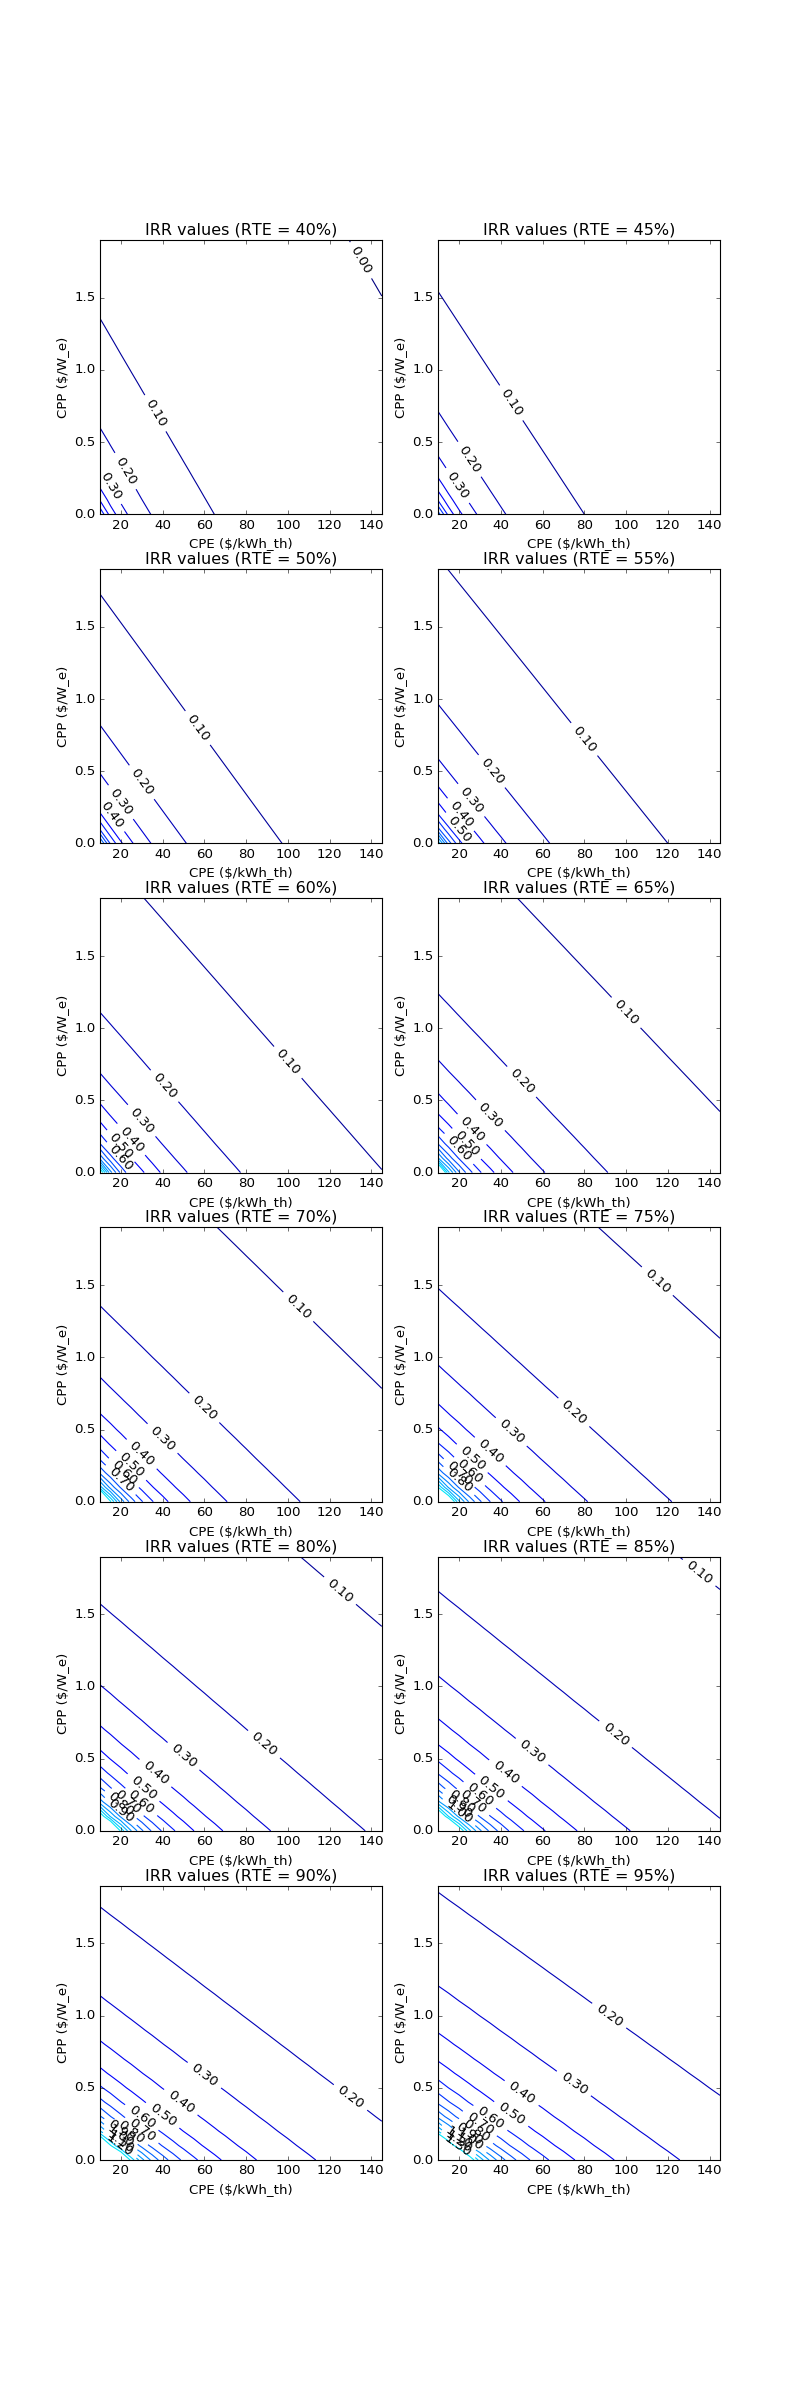

In [26]:
# file name: IRR_vs_RTE
"""
the code takes in the datat from RTE database and plots the IRR contours for 
different round trip efficiencies.

"""

import sys
#Check and see if the current working path exists in python system.
#otherwise add it.
curr_path = 'D:\\Nextcloud\\Thermal Battery Research\\modelling\\python'
if curr_path not in sys.path:
    sys.path.append('D:\\Nextcloud\\Thermal Battery Research\\modelling\\python')
    print('Path added!')

#This magic command allows showing plots in Jupyter and makes them interactive.
%matplotlib notebook 

from projdirs import datadir, figdir, resultsdir
import numpy as np
import matplotlib.pyplot as mpl
from matplotlib.pyplot import contourf
from matplotlib import rcParams
import pdb
import sqlite3

state = 'NSW'
state = '"'+state+'"'
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'RTE.db')
cursor = connection.cursor()

cursor.execute("""SELECT obj FROM obj_vs_RTE WHERE state = 'NSW' AND sh=10 """)
OBJ = np.array([row[0] for row in cursor.fetchall()])

cursor.execute("""SELECT rte FROM obj_vs_RTE WHERE state = 'NSW' AND sh=10 """)
RTE = np.array([row[0] for row in cursor.fetchall()])

OBJ = OBJ[7:-1]
RTE = RTE[7:-1]


SH = 10
Pout_max = 50 #MWth
Q_max = Pout_max*SH*1000 # kWhth


CPP_range = np.arange(0,2,0.1) # $/We - the cost of power block with steam turbines are in the range of 1-2 $/W
CPE_range = np.arange(10,150,5) # $/kWhth

fig, axs = mpl.subplots(6,2, figsize=(10, 30), facecolor='w', edgecolor='k')
axs = axs.ravel()
fig.subplots_adjust(hspace = 0.2, wspace=0.2)
for i in range(len(RTE)):
    eta_out = RTE[i]/0.99
    IRR = np.array([])
    for CPP in CPP_range:
        row = np.array([])
        for CPE in CPE_range:
            CAPEX = CPP*Pout_max*eta_out*1e6 + CPE*Q_max
            # create the array of cash flows, flow-in: positive   flow-out: negative
            cashflows = np.insert(OBJ[i]*np.ones(30),0,-CAPEX)
            row = np.append(row, np.irr(cashflows))
    #         pdb.set_trace()
        if len(IRR)==0:
            IRR = row
        else:
#             pdb.set_trace()
            IRR = np.vstack((IRR, row))

    X, Y = np.meshgrid(CPE_range, CPP_range)
    levels = np.append(np.arange(0,1.5,0.1),4)
    
    plot = axs[i].contour(X,Y, IRR, levels) 
#     mpl.colorbar(plot,cax=axs[i])
    mpl.clabel(plot, colors = 'k', fmt = '%2.2f', fontsize=12)
    axs[i].set_xlabel('CPE ($/kWh_th)')
    axs[i].set_ylabel('CPP ($/W_e)')
    axs[i].set_title('IRR values (RTE = %2.0f'% (RTE[i]*100 )+'%)')


# Analyse storage value with FCAS

In [11]:
import matplotlib as mpl
year = '2018-19'

state = 'TAS'

for fcas_market in ['raise_6sec','raise_60sec','raise_5min','raise_reg',
                    'lower_6sec','lower_60sec','lower_5min','lower_reg']:
    connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_arbitrage_with_fcas.db')
    cursor = connection.cursor()
    cursor.execute(
        "SELECT * FROM obj_vs_fcas_frac WHERE state=" + '"'+state+'"' + " AND fcas_market = " + '"' + fcas_market + '"')
    data = pd.DataFrame([row for row in cursor.fetchall()]).drop(0, axis=1)
    data.columns = ['state', 'year', 'sh', 'rte', 'fcas_frac', 'fcas_market', 'obj']

    RTE1=90
    RTE2=40

    ax = data[data['rte']==RTE1].plot(kind='line', x='fcas_frac', y='obj', color="b", label='RTE='+str(RTE1), figsize=(10,5), marker='o')
    data[data['rte']==RTE2].plot(kind='line', x='fcas_frac', y='obj', color="r", label='RTE='+str(RTE2), marker='o', ax=ax)

    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_ylabel('Storage value [$/year]')
    ax.set_xlabel('FCAS fraction [%]')
    ax.set_title('Region= %s, FCAS market= %s, FY %s' %(state, fcas_market, year))
    ax.grid()
    ax.set_xticks(np.arange(0,110,10))
    ax.set_xlim([0,100])
    print(data)
    plt.tight_layout()

    plt.savefig(
                'D:\Nextcloud\Thermal Battery Research\Publications\The value of grid-scale electricity storage in competitive energy market\\pictures\\Storage value FIXED FCAS\\%s-SV-%s (%s).png' %(state, fcas_market, year))




C:\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


   state  year  sh  rte  fcas_frac fcas_market           obj
0    TAS  2019  10   40          0  raise_6sec  3.384869e+06
1    TAS  2019  10   40         10  raise_6sec  3.461432e+06
2    TAS  2019  10   40         20  raise_6sec  3.533761e+06
3    TAS  2019  10   40         30  raise_6sec  3.600790e+06
4    TAS  2019  10   40         40  raise_6sec  3.662972e+06
5    TAS  2019  10   40         50  raise_6sec  3.717555e+06
6    TAS  2019  10   40         60  raise_6sec  3.764487e+06
7    TAS  2019  10   40         70  raise_6sec  3.800471e+06
8    TAS  2019  10   40         80  raise_6sec  3.817172e+06
9    TAS  2019  10   40         90  raise_6sec  3.799530e+06
10   TAS  2019  10   40        100  raise_6sec  3.623074e+06
11   TAS  2019  10   90          0  raise_6sec  8.199287e+06
12   TAS  2019  10   90         10  raise_6sec  8.069754e+06
13   TAS  2019  10   90         20  raise_6sec  7.913602e+06
14   TAS  2019  10   90         30  raise_6sec  7.730319e+06
15   TAS  2019  10   90 

KeyError: '[0] not found in axis'

# Analyse the storage value with variable FCAS

In [14]:
import matplotlib as mpl
year = '2018-19'

state = 'NSW'

# for fcas_market in ['raise_6sec','raise_60sec','raise_5min','raise_reg']:
                    
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_arbitrage_with_variable_fcas.db')
cursor = connection.cursor()
cursor.execute(
    "SELECT * FROM obj_vs_fcas_frac WHERE state='NSW'")
data = pd.DataFrame([row for row in cursor.fetchall()]).drop(0, axis=1)
data.columns = ['state', 'year', 'sh', 'rte', 'fcas_market', 'obj']
data

,state,year,sh,rte,fcas_market,obj
0,NSW,2019,10,40,raise_5min,5.161270e+06
1,NSW,2019,10,40,raise_60sec,3.799089e+06
2,NSW,2019,10,40,raise_6sec,4.053565e+06
3,NSW,2019,10,40,raise_reg,1.097429e+07
4,NSW,2019,10,90,raise_5min,9.363263e+06
5,NSW,2019,10,90,raise_60sec,8.239112e+06
6,NSW,2019,10,90,raise_6sec,8.475718e+06
7,NSW,2019,10,90,raise_reg,1.420850e+07


In [17]:
import matplotlib as mpl
year = '2018-19'

state = 'SA'

# for fcas_market in ['raise_6sec','raise_60sec','raise_5min','raise_reg']:
                    
connection = sqlite3.connect(datadir + 'arbitrage\\' + 'storage_arbitrage_with_fcas.db')
cursor = connection.cursor()
cursor.execute(
    "SELECT * FROM obj_vs_fcas_frac WHERE state='NSW' AND fcas_frac=0")
data = pd.DataFrame([row for row in cursor.fetchall()]).drop(0, axis=1)
data.columns = ['state', 'year', 'sh', 'rte', 'fcas_frac', 'fcas_market', 'obj']
data

,state,year,sh,rte,fcas_frac,fcas_market,obj
0,NSW,2019,10,40,0,raise_5min,1.529663e+06
1,NSW,2019,10,40,0,raise_60sec,1.529986e+06
2,NSW,2019,10,40,0,raise_6sec,1.529986e+06
3,NSW,2019,10,40,0,raise_reg,1.529986e+06
4,NSW,2019,10,90,0,raise_5min,6.902284e+06
5,NSW,2019,10,90,0,raise_60sec,6.902284e+06
6,NSW,2019,10,90,0,raise_6sec,6.902284e+06
7,NSW,2019,10,90,0,raise_reg,6.902284e+06
